##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Scikit-Learn Model Card Toolkit Demo


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/responsible_ai/model_card_toolkit/examples/Scikit_Learn_Model_Card_Toolkit_Demo"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/model-card-toolkit/model_card_toolkit/documentation/examples/Scikit_Learn_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Background
This notebook demonstrates how to generate a model card using the Model Card Toolkit with a scikit-learn model in a Jupyter/Colab environment. You can learn more about model cards at [https://modelcards.withgoogle.com/about](https://modelcards.withgoogle.com/about).

## Setup
We first need to install and import the necessary packages.

### Upgrade to Pip 20.2 and Install Packages

In [ ]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached model_card_toolkit-1.3.2-py3-none-any.whl (79 kB)
     |████████████████████████████████| 1.8 MB 30.6 MB/s            
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     |████████████████████████████████| 48 kB 4.7 MB/s             
     |████████████████████████████████| 2.4 MB 51.3 MB/s            
     |████████████████████████████████| 56 kB 4.6 MB/s             
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
     |████████████████████████████████| 6.6 MB 45.3 MB/s            
     |████████████████████████████████| 49 kB 5.1 MB/s             
     |████████████████████████████████| 129 kB 52.7 MB/s            
     |████████████████████████████████| 14.8 MB 31.2 MB/s            
     |████████████████████████████████| 19.1 MB 327 kB/s             
     |██

### Did you restart the runtime?

If you are using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...).

### Import packages

We import necessary packages, including scikit-learn.

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

## Load data

This example uses the Breast Cancer Wisconsin Diagnostic dataset that scikit-learn can load using the [load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

In [ ]:
airplane = pd.read_csv("airplane.csv")
airplane

,Unnamed: 0,image_Height,image_Width,image_Format,image_mode,image_Animated,image_Frames,image_id,class,Xmin,Xmax,Ymin,Ymax,width,height
0,0,2560,2560,JPEG,RGB,False,1,78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg,Airplane,209,354,55,234,145,179
1,1,2560,2560,JPEG,RGB,False,1,78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg,Airplane,1660,1841,72,266,181,194
2,2,2560,2560,JPEG,RGB,False,1,78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg,Airplane,2185,2280,71,159,95,88
3,3,2560,2560,JPEG,RGB,False,1,78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg,Airplane,2397,2522,171,274,125,103
4,4,2560,2560,JPEG,RGB,False,1,78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg,Airplane,2309,2491,300,459,182,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,3420,2560,2560,JPEG,RGB,False,1,ed921ec7-b950-460c-a912-12247d867fea.jpg,Airplane,1160,1270,2091,2186,110,95
3421,3421,2560,2560,JPEG,RGB,False,1,ed921ec7-b950-460c-a912-12247d867fea.jpg,Airplane,1491,1600,2185,2276,109,91
3422,3422,2560,2560,JPEG,RGB,False,1,ed921ec7-b950-460c-a912-12247d867fea.jpg,Airplane,1440,1553,2298,2390,113,92
3423,3423,2560,2560,JPEG,RGB,False,1,ed921ec7-b950-460c-a912-12247d867fea.jpg,Airplane,439,508,2048,2108,69,60


In [ ]:
plane_num = pd.read_csv("image_planes_num.csv")
plane_num

,Unnamed: 0,index,class,count
0,0,014de911-7810-4f7d-8967-3e5402209f4a.jpg,Airplane,31
1,1,014de911-7810-4f7d-8967-3e5402209f4a.jpg,Truncated_airplane,1
2,2,0263270b-e3ee-41dc-aeef-43ff77e66d5b.jpg,Airplane,39
3,3,0263270b-e3ee-41dc-aeef-43ff77e66d5b.jpg,Truncated_airplane,1
4,4,03f84930-e2be-4c19-9afc-0dc26d02538e.jpg,Airplane,20
...,...,...,...,...
152,152,fc1ab8ce-e531-46ed-b74b-0374cd58cf2a.jpg,Airplane,56
153,153,fc1ab8ce-e531-46ed-b74b-0374cd58cf2a.jpg,Truncated_airplane,2
154,154,fc8f9dc5-b6a2-49f3-9bde-1f8ff382ca5f.jpg,Airplane,28
155,155,fc8f9dc5-b6a2-49f3-9bde-1f8ff382ca5f.jpg,Truncated_airplane,1


## Plot data

We will create several plots from the data that we will include in the model card.

In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

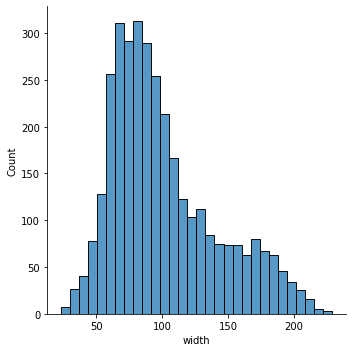

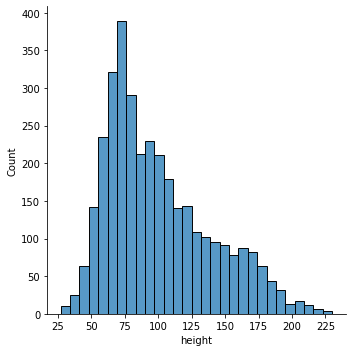

In [ ]:
# Plot the mean radius feature for both the train and test sets

sns.displot(x=airplane['width'])
airplane_width = plot_to_str()

sns.displot(x=airplane['height'])
airplane_height = plot_to_str()

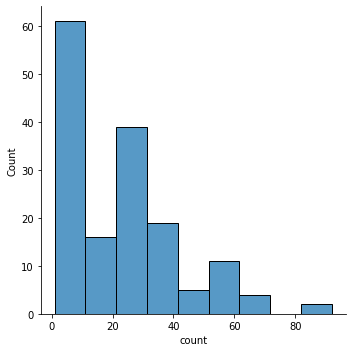

In [ ]:
# Plot the mean texture feature for both the train and test sets

sns.displot(x=plane_num['count'])
plane_num_count = plot_to_str()

# sns.displot(x=plane_num['mean texture'], hue=y_test)
# mean_texture_test = plot_to_str()

## Train model

In [ ]:
# Create a classifier and fit the training data

## Evaluate model

In [ ]:
# Plot a ROC curve

# plot_roc_curve(clf, X_test, y_test)
# roc_curve = plot_to_str()

In [ ]:
# Plot a confusion matrix

# plot_confusion_matrix(clf, X_test, y_test)
# confusion_matrix = plot_to_str()

## Create a model card

### Initialize toolkit and model card

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate information into model card

In [ ]:
model_card.model_details.name = 'Aircraft Detection Dataset'
model_card.model_details.overview = (
    'This model predicts location of airplanes on image and provide confidence interval')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://www.kaggle.com/code/jeffaudi/aircraft-detection-with-yolov5/notebook')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Civil aircraft Detection in airport')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Aircraft Detection')]
model_card.considerations.users = [mctlib.User(description='Geological professionals'), mctlib.User(description='ML researchers')]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  "desc1")
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=airplane_width),
    mctlib.Graphic(image=airplane_height)
]
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = (
  'Desc')
model_card.model_parameters.data[1].graphics.collection = [
    mctlib.Graphic(image=plane_num_count)
]
model_card.quantitative_analysis.graphics.description = (
  'No quantitative now')
model_card.quantitative_analysis.graphics.collection = [
    # mctlib.Graphic(image=roc_curve),
    # mctlib.Graphic(image=confusion_matrix)
]

mct.update_model_card(model_card)

## Generate model card

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))